<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-2-Linear-Models/blob/master/10pm_SUN_Mar_8_build_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# read in dataset 1: pokemon Go character sightings

import pandas as pd

'''
from google.colab import drive
drive.mount('/content/drive')

print('mounted')
'''

df = pd.read_csv('/content/drive/My Drive/predictemall/300k.csv')

#df = pd.read_csv('300k.csv')
pd.set_option("display.max_rows", 91835)
pd.set_option("display.max_columns", 300)
#df
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,True,True,True,False,0.049869,True,True,True,True,True,True,0.081776,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,True,True,True,False,0.259156,False,False,True,True,True,True,0.195622,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fal

In [55]:
df.shape

(296021, 208)

In [56]:
df.sample(100)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
69053,90,52.365668,-7.715133,2016-09-06T12:45:49,NTQwODUyMDM3NjAwOTM2MTc1Nw==,5207060695715151900,5207060695648043000,5207060695379607600,5207060694305865700,5207060690010898400,5207060638471290900,5207060844629721100,afternoon,14,45,Saturday,6,8,2016,10,False,Dublin,Europe,Overcast,19.8,10.90,199,1019.87,cloudy,412,6,52,445,1208,20,8,351,426.502200,False,True,True,False,9.601011,False,False,False,False,False,False,5.636576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,90
32270,96,41.018790,-81.610486,2016-09-07T00:43:45,MjgxNjEwMjMwNTgyMjgwNDcwMQ==,9813576150788604000,9813576150587277000,9813576150855713000,9813576147634487000,9813576151929455000,9813576203469062000,9813576409627492000,night,2,43,Sunday,7,8,2016,14,False,New_York,America,PartlyCloudy,25.9,4.08,230,1018.86,partly-cloudy-night,419,6,59,883,1191,19,51,-111,256.713560,False,False,True,False,0.281259,False,False,True,True,True,True,0.12697,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [0]:
import pandas as pd

# read in dataset 2: encoded names and corresponding id#s
df_Names = pd.read_csv('/content/drive/My Drive/predictemall/pokemonNumbers.csv', header= None) #RT CLK ON FILE TO PUT PATH HERE OK
pd.set_option("display.max_rows", 91835)
df_Names.columns=['pokemonId', 'pokemonName'] # change df_Names column names to align with the proper columns for merge.

df_Names

In [0]:
df_Names.head(20)

In [59]:
df_Names.shape

(150, 2)

In [0]:
import pandas as pd

#EXPLORATORY DATA ANALYSIS/DATA WRANGLING

#df3 IS MERGED DF OF df and df_Names
df3 =  pd.merge(df_Names, df, on = 'pokemonId')

#df3 = df.merge(df_Names, on='pokemonId')  #SYNTAX NOT WORKING
pd.set_option("display.max_rows", 91835)
# merge df and df_Names to make df3
df3.head()


In [61]:
df3.shape

(296021, 209)

In [0]:
df3.sample(100)

In [63]:
#Choosing'appearedDayOfWeek' as target
df3['appearedDayOfWeek'].nunique()

7

In [64]:
df3['appearedDayOfWeek'].value_counts()

Saturday     72201
Friday       68037
Wednesday    60115
Thursday     54257
Sunday       32056
dummy_day     9001
Tuesday        354
Name: appearedDayOfWeek, dtype: int64

In [0]:
#df3['appearedDayOfWeek'].nunique()

In [0]:
# check df Nulls- returns 0 for all columns
df.isnull().sum()

In [67]:
# check df_Names Nulls- returns 0 for all columns
df_Names.isnull().sum()

pokemonId      0
pokemonName    0
dtype: int64

In [0]:
# check df3 Nulls- returns 0 for all columns
df3.isnull().sum()

In [0]:
#df.columns.to_list()

In [70]:
df3['appearedDayOfWeek']

0         dummy_day
1         dummy_day
2         dummy_day
3         dummy_day
4         dummy_day
            ...    
296016    Wednesday
296017    Wednesday
296018    Wednesday
296019    Wednesday
296020    Wednesday
Name: appearedDayOfWeek, Length: 296021, dtype: object

# **Using correlation matrix and heatmap to determine which features to include in models**

In [0]:
#For Correlation matrix: setting categories to type 'category' for faster operations
#df['column1'] = df['column1'].astype('category') ?? = typecasting

# **use df.replace() instead of encoding days of week**

In [0]:
#convert days of week to Floats for computing accuracy
df3['appearedDayOfWeek'].replace('Sunday', 1.0, inplace = True)
df3['appearedDayOfWeek'].replace('dummy_day', 2.0, inplace = True)
df3['appearedDayOfWeek'].replace('Tuesday', 3.0, inplace = True)
df3['appearedDayOfWeek'].replace('Wednesday', 4.0, inplace = True)
df3['appearedDayOfWeek'].replace('Thursday', 5.0, inplace = True)
df3['appearedDayOfWeek'].replace('Friday', 6.0, inplace = True)
df3['appearedDayOfWeek'].replace('Saturday', 7.0, inplace = True)
df3.sample(100)

In [85]:
#View correlation matrix- at the moment only interested in features positively correlated with 'appearedDayOfWeek" 
df3.corr()

,pokemonId,latitude,longitude,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
pokemonId,1.000000,-0.010955,0.006406,-0.008460,-0.008460,-0.008460,-0.008460,-0.008460,-0.008460,-0.008460,-0.007141,0.005471,0.007068,-0.002618,NaN,NaN,-0.026443,0.088129,0.005814,0.015751,-0.007591,-0.022961,-0.001392,-0.009748,0.015336,-0.005822,-0.008175,-0.009978,0.004034,0.005272,0.082982,0.064615,0.051818,0.037251,-0.037251,-0.001466,0.015684,0.029790,0.048187,0.046560,0.027248,0.016241,0.066185,0.064872,0.040500,0.028304,0.014097,0.009745,0.005171,0.002075,0.002587,0.001590,0.000097,-0.000721,1.697317e-02,0.007362,0.008912,-0.007135,-0.001469,-0.002190,-0.020074,-0.014505,-0.003587,-0.009102,-0.023161,-0.006328,-0.041131,-0.020570,-0.029474,-0.009684,0.012249,0.001212,0.005037,0.000713,0.020071,0.003083,0.009117,1.259082e-03,-0.000256,0.042812,0.004767,0.004141,0.021339,0.004660,0.004162,0.001829,-0.005042,0.002039,0.017676,-0.005219,-0.001302,-0.000188,-0.003095,-0.013081,-0.003105,-0.030901,-0.004883,0.011017,0.001868,-0.002281,0.000668,0.118712,0.026785,0.008162,-0.000430,0.002668,-0.001052,0.057322,0.016497,0.003276,0.001363,0.075722,-0.000424,0.015436,0.006915,NaN,-0.002062,0.006173,-0.001375,0.054896,0.019800,0.013625,0.005023,0.002486,0.009137,0.005226,0.083237,0.017344,0.030044,0.005773,0.004069,0.010347,0.011323,0.014154,0.001200,0.005038,0.004345,0.030146,0.005769,0.017449,0.000764,-0.001210,0.007101,0.051852,0.012122,0.023732,0.006044,0.020298,0.008252,-0.005980,-0.002406,0.008200,0.004700,0.004200,-0.000267,-0.002430,-0.009396,-0.000948,0.010649,0.002122,0.002928,-0.000576,-0.001741,0.023045,0.001033,0.046877,0.009299,0.043744,0.008951,-0.007047,0.001493,0.027117,0.002371,0.002538,0.004168,0.004167,0.073605,0.008134,0.004716,NaN,-0.059806,0.005811,0.001201,0.002786,0.001845,0.017391,0.005755,0.010395,0.006363,0.003107,-0.003397,NaN,NaN,NaN,0.046934,0.018680,0.001363,NaN,NaN,1.000000
latitude,-0.010955,1.000000,-0.138568,-0.272649,-0.272649,-0.272649,-0.272649,-0.272649,-0.272649,-0.272649,0.160109,-0.005828,0.028121,-0.069665,NaN,NaN,-0.087554,-0.105964,-0.220282,-0.004611,0.026861,0.038513,-0.139975,-0.161921,0.071018,-0.057027,0.647420,0.568059,0.131826,0.11304

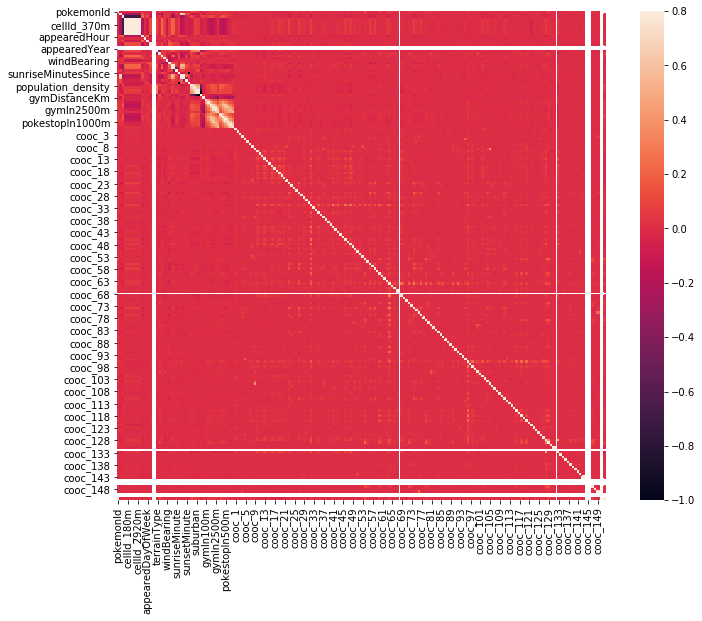

In [86]:
#Correlation heatmap: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
#trim df to reduce noise:


In [75]:
df3['appearedDayOfWeek'].nunique()

7

In [76]:
df3['appearedDayOfWeek'].value_counts()

Saturday     72201
Friday       68037
Wednesday    60115
Thursday     54257
Sunday       32056
dummy_day     9001
Tuesday        354
Name: appearedDayOfWeek, dtype: int64

In [0]:
#df3.sort_by('pokemonId', ascending = True)

In [0]:
#Get BASELINE- the first way to get the highest accuracy by assuming majority, [by] assum[ing] majority:

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 300000)
'''
average for regression should be the majority value in a sense; 
classification is assuming all values are the highest majority value- BASELINE IS PREDICTING MODE CLASS (largest # of observations
'''

df3['appearedDayOfWeek'].value_counts()
# our BASELINE IS SATURDAY, WITH 72201 appearances on that day

In [81]:
# Fit a Classification model
# Try a shallow decision tree as a fast, first model

#pip install --upgrade category_encoders
# from sklearn.preprocessing import CategoricalEncoder
#pip install category_encoders

!pip install category_encoders==2.* 

import numpy as np
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

#encoder = ce.OrdinalEncoder(cols=[...])

target = 'appearedDayOfWeek'
features = ['appearedMonth', 'appearedYear', 'appearedDay', 'pokestopDistanceKm', 'weather', 'latitude', 'longitude']

#train = df 

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target])

#train, test = train_test_split(df)- Bruno thought was synonymous with above line

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier()
)


In [0]:
#label encoding using https://colab.research.google.com/github/LambdaTheda/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb#scrollTo=-qgpc344EMzv

df['column1'] = df['column1'].cat.codes

In [0]:
#fit model 1: Random Forest Classifier and score accuracy

In [0]:

pipeline.fit(X_train, y_train)

acc_score = pipeline.score(test[features], test[target])

#ra_score = roc_auc_score(test[target], pipeline.predict(test[features]))

print(f'Test Accuracy: {pipeline.score(X_test, y_test)}')
print(f'Test ROC AUC: {roc_auc_score(y_test, pipeline.predict(X_test))}\n')

'''
print(f'Val Accuracy: {acc_score}')
print(f'Val ROC AUC: {ra_score}')
'''